In [20]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt

In [21]:
path = "/data/scratch/declan/sdss_like_galaxies/"

In [22]:
sample = torch.load(path + "dataset_0.pt")

In [23]:
type(sample)

list

In [24]:
len(sample)

1024

In [25]:
type(sample[0])

dict

In [26]:
sample[0].keys()

dict_keys(['images', 'background', 'deconvolution', 'psf_params', 'tile_catalog'])

In [27]:
sample[0]['images'].shape

torch.Size([5, 80, 80])

The 5 images above correspond to the u,g,r,i,z bands. We can plot each of them.

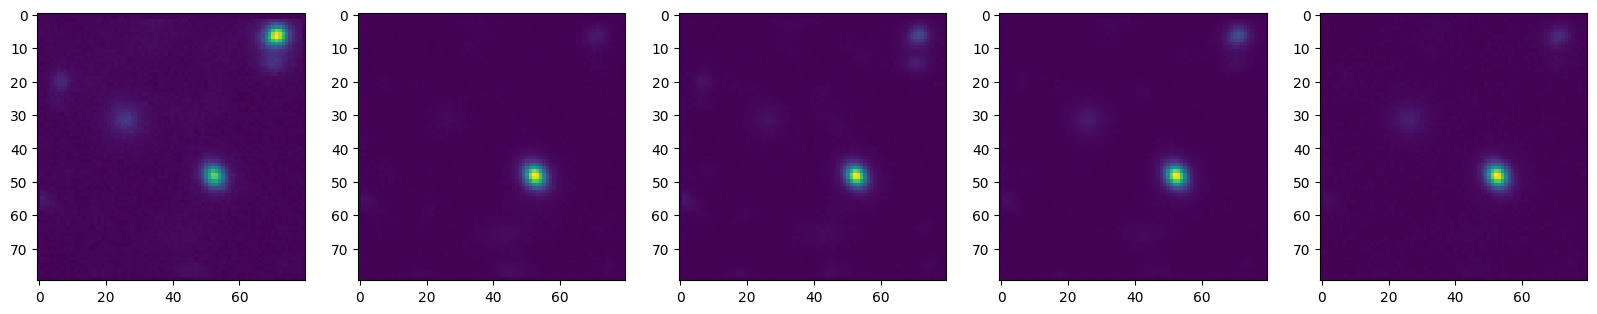

In [28]:
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,100))
ax[0].imshow(sample[0]['images'][0])
ax[1].imshow(sample[0]['images'][1])
ax[2].imshow(sample[0]['images'][2])
ax[3].imshow(sample[0]['images'][3])
ax[4].imshow(sample[0]['images'][4])

In [29]:
sample[0]['tile_catalog']['redshifts'].reshape((20,20))

tensor([[0.2134, 0.0712, 0.0306, 0.0294, 0.1863, 0.0150, 0.1727, 0.0317, 0.0226,
         0.2936, 0.1327, 0.1259, 0.1309, 0.3612, 0.1337, 0.0843, 0.0562, 0.0156,
         0.0834, 0.1396],
        [0.4086, 0.2834, 0.0627, 0.0643, 0.1496, 0.1052, 0.0562, 0.0159, 0.2009,
         0.1089, 0.0686, 0.0614, 0.4613, 0.0774, 0.1728, 0.2064, 0.4167, 0.1146,
         0.1415, 0.3949],
        [0.1079, 0.1110, 0.0737, 0.1308, 0.2169, 0.0879, 0.1795, 0.0331, 0.0127,
         0.0392, 0.1160, 0.2100, 0.1195, 0.0563, 0.1292, 0.0510, 0.1049, 0.0257,
         0.2521, 0.0809],
        [0.2685, 0.1217, 0.0897, 0.2009, 0.1018, 0.1028, 0.0617, 0.2257, 0.1794,
         0.0250, 0.1252, 0.0556, 0.0897, 0.1231, 0.0767, 0.1133, 0.1262, 0.0892,
         0.0292, 0.0952],
        [0.0398, 0.0749, 0.1000, 0.0608, 0.0637, 0.4909, 0.0686, 0.0626, 0.1083,
         0.0652, 0.3225, 0.1226, 0.0508, 0.1016, 0.1393, 0.0292, 0.0442, 0.3917,
         0.0969, 0.0562],
        [0.0957, 0.0292, 0.0449, 0.3006, 0.0706, 0.0063, 0.1

In [30]:
sample[0]['tile_catalog'].keys()

dict_keys(['locs', 'n_sources', 'source_type', 'galaxy_fluxes', 'galaxy_params', 'star_fluxes', 'redshifts'])

In [31]:
sample[0]['tile_catalog']['n_sources']

tensor([[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
        [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0,

In [34]:
sample[0]['tile_catalog']['locs'].reshape((20,20,2))

tensor([[[2.7401e-01, 4.5627e-01],
         [4.9972e-01, 6.6532e-02],
         [3.3090e-01, 1.4780e-01],
         [2.6440e-01, 3.3328e-01],
         [3.5633e-01, 2.5803e-01],
         [8.0919e-01, 2.2501e-01],
         [2.3993e-01, 7.8461e-01],
         [6.0230e-01, 4.0145e-01],
         [2.1070e-01, 8.4381e-01],
         [4.8868e-02, 8.4039e-01],
         [1.6567e-01, 6.2385e-01],
         [7.2194e-01, 3.7000e-02],
         [8.3192e-01, 7.5425e-01],
         [5.9389e-01, 7.1751e-01],
         [8.4443e-01, 7.9373e-01],
         [6.3690e-01, 5.2127e-01],
         [1.7617e-01, 6.8671e-01],
         [9.4578e-01, 1.5026e-01],
         [7.2395e-01, 2.0207e-01],
         [9.4517e-01, 4.4714e-01]],

        [[3.6235e-02, 8.9580e-01],
         [2.2602e-01, 5.9588e-01],
         [6.5126e-01, 6.0207e-01],
         [3.8109e-01, 5.6168e-01],
         [5.3784e-01, 9.5656e-01],
         [8.2840e-01, 1.9194e-01],
         [3.0644e-01, 5.4637e-01],
         [1.8946e-01, 2.7190e-01],
         [8.7963e-

In [37]:
sample[0]['tile_catalog']['galaxy_fluxes'].reshape((20,20,5))

tensor([[[1.1298e+00, 2.2163e-01, 6.6308e-01, 5.5859e-01, 5.8898e-01],
         [1.7438e+00, 1.1315e-01, 7.4472e-01, 8.8525e-01, 1.1592e+00],
         [1.6390e+02, 1.0373e+01, 2.1870e+01, 6.5777e+01, 3.1681e+02],
         ...,
         [7.2219e-01, 4.5709e-02, 7.2219e-01, 7.1422e-01, 3.1571e+00],
         [1.6233e+01, 1.6047e+00, 1.1869e+01, 1.2480e+01, 4.0222e+01],
         [1.7914e+00, 1.7872e-01, 1.3451e+00, 4.0250e-01, 2.2587e-01]],

        [[2.6617e+00, 2.8251e-01, 1.2244e+00, 1.8591e+00, 1.0407e+00],
         [1.7101e+00, 1.3132e-01, 9.1228e-01, 8.6481e-01, 1.5579e+00],
         [1.2953e+00, 5.4607e-01, 9.7123e-01, 1.2382e+00, 3.3365e+00],
         ...,
         [3.4041e+02, 2.1545e+01, 1.2847e+02, 2.7445e+02, 3.5158e+02],
         [9.3348e-01, 2.6302e-01, 2.5376e+00, 9.2201e-01, 2.3589e+00],
         [4.8252e+01, 1.8164e+01, 6.3793e+01, 3.1326e+01, 7.2289e+01]],

        [[6.1292e-01, 1.1947e-01, 1.5629e+00, 1.8419e+00, 1.3271e+01],
         [2.0084e+00, 1.8873e-01, 1.3522e+00,

In [41]:
sample[0]['tile_catalog']['source_type'].reshape((20,20))

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1.],
        [1

In [47]:
sample[5]['tile_catalog']['redshifts'].reshape((20,20))

tensor([[0.0705, 0.0391, 0.0985, 0.1774, 0.1675, 0.1829, 0.0744, 0.1030, 0.1124,
         0.2197, 0.0889, 0.1229, 0.0141, 0.1045, 0.0773, 0.1257, 0.0958, 0.1503,
         0.3914, 0.0794],
        [0.1799, 0.0513, 0.1556, 0.1602, 0.0709, 0.0832, 0.1083, 0.3238, 0.1526,
         0.0461, 0.4598, 0.1474, 0.0228, 0.3597, 0.0565, 0.0773, 0.0939, 0.0941,
         0.0645, 0.1128],
        [0.0833, 0.1700, 0.0694, 0.0257, 0.0899, 0.1072, 0.1642, 0.1271, 0.1451,
         0.0382, 0.1153, 0.0730, 0.0977, 0.5163, 0.4440, 0.2259, 0.1070, 0.4106,
         0.1061, 0.1030],
        [0.0821, 0.0890, 0.0641, 0.2684, 0.1863, 0.1360, 0.1412, 0.0730, 0.1316,
         0.1445, 0.1707, 0.1218, 0.0522, 0.1667, 0.0769, 0.1654, 0.3007, 0.1586,
         0.2861, 0.1675],
        [0.0919, 0.1494, 0.0721, 0.0656, 0.1195, 0.1707, 0.1355, 0.0922, 0.0617,
         0.2679, 0.4799, 0.0698, 0.4863, 0.0733, 0.1807, 0.1450, 0.0481, 0.0802,
         0.1774, 0.1101],
        [0.1767, 0.0697, 0.0965, 0.0914, 0.1498, 0.2377, 0.3